In [1]:
%matplotlib inline

import timeit
from max_flow import Flow
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
from math import floor


In [34]:
from project_selection import ProjectSelection

t1_y = []
t2_y = []
t3_y = []

x = range(1,1000,10)

for m in x:
    def_aumento_m = "1\n" + str(m) + "\n1\n" 
    def_aumento_m_con_deps = "1\n" + str(m) + "\n1000\n"
    def_aumento_m_con_deps_costo = "1\n" + str(m) + "\n1000\n"
    for i in range(1,m+1):
        def_aumento_m += "1\n"
        def_aumento_m_con_deps += "1 1\n"
        def_aumento_m_con_deps_costo += "10 1\n"
    ps1 = ProjectSelection(def_aumento_m, solve = False)
    ps2 = ProjectSelection(def_aumento_m_con_deps, solve = False)
    ps3 = ProjectSelection(def_aumento_m_con_deps_costo, solve = False)
    
    t = timeit.Timer(partial(ps1.solve))
    t1_y.append((t.timeit(1)))
    t = timeit.Timer(partial(ps2.solve))
    t2_y.append((t.timeit(1)))
    t = timeit.Timer(partial(ps3.solve))
    t3_y.append((t.timeit(1)))

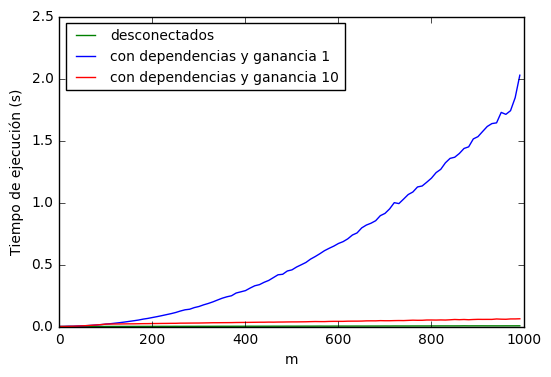

In [43]:
x = range(1,1000,10)
plt.xlabel("m")
plt.ylabel("Tiempo de ejecución (s)")

plt.plot(x,t1_y,'g', label="desconectados")
plt.plot(x,t2_y,'b', label="con dependencias y ganancia 1")
plt.plot(x,t3_y,'r', label="con dependencias y ganancia 10")
plt.legend(loc='upper left', prop={'size': 10})

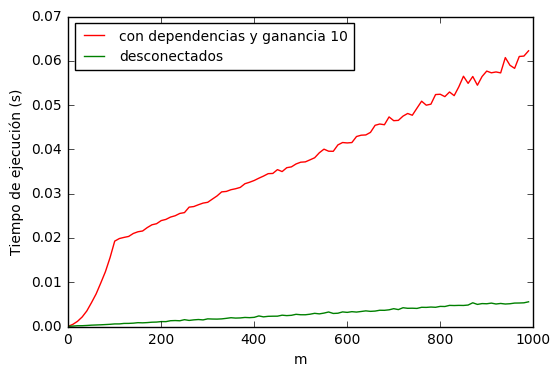

In [45]:
plt.xlabel("m")
plt.ylabel("Tiempo de ejecución (s)")
plt.plot(x,t3_y,'r', label="con dependencias y ganancia 10")
plt.plot(x,t1_y,'g', label="desconectados")
plt.legend(loc='upper left', prop={'size': 10})

In [29]:
# Hardcore. Inicio con 100 areas y vamos agregando proyectos y conectando en frente y todos con uno.

x = range(1,1000,10)
t_enfrente = []
t_a_uno = []
t_mezclado = []
# TODO agregar mezclado/clusterizado.

for m in x:
    def_enfrente = "1000\n" + str(m) +"\n"
    def_a_uno = "1000\n" + str(m) +"\n"
    def_mezclado = "1000\n" + str(m) +"\n"
    for i in range (1000):
        def_enfrente += "1000\n"
        def_a_uno += "1000\n"
        def_mezclado += "1000\n"
    for i in range(1,m+1):
        def_enfrente += "10 " + str(i) + "\n"
        def_a_uno +="10 1\n"
        if i%2 == 0 and i+1 < 1000:
            def_mezclado += "10 " + str(i-1) + " " + str(i+1) +"\n"
        else:
            def_mezclado += "10\n"
    ps_enfrente = ProjectSelection(def_enfrente, solve = False)
    ps_a_uno = ProjectSelection(def_a_uno, solve = False)
    ps_mezclado = ProjectSelection(def_mezclado, solve = False)
    
    t = timeit.Timer(partial(ps_enfrente.solve))
    t_enfrente.append((t.timeit(1)))
    t = timeit.Timer(partial(ps_a_uno.solve))
    t_a_uno.append((t.timeit(1)))
    t = timeit.Timer(partial(ps_mezclado.solve))
    t_mezclado.append((t.timeit(1)))

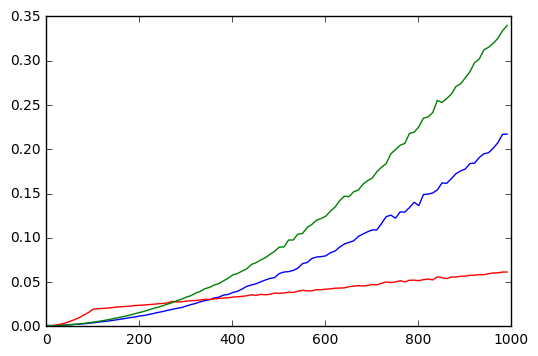

In [30]:
x = range(1,1000,10)
plt.plot(x,t_enfrente, 'b')
plt.plot(x,t_a_uno, 'r')
plt.plot(x,t_mezclado, 'g')

In [37]:
# Hardcore. Inicio con 100 areas y vamos agregando proyectos y conectando en frente y todos con uno.

x = range(1,1000,10)
t_enfrente2 = []
t_a_uno2 = []
t_mezclado2 = []
# TODO agregar mezclado/clusterizado.

for m in x:
    def_enfrente = "1000\n" + str(m) +"\n"
    def_a_uno = "1000\n" + str(m) +"\n"
    def_mezclado = "1000\n" + str(m) +"\n"
    for i in range (1000):
        def_enfrente += "1000\n"
        def_a_uno += "1000\n"
        def_mezclado += "1000\n"
    for i in range(1,m+1):
        def_enfrente += "1 " + str(i) + "\n"
        def_a_uno +="1 1\n"
        if i%2 == 0 and i+1 < 1000:
            def_mezclado += "1 " + str(i-1) + " " + str(i+1) +"\n"
        else:
            def_mezclado += "10\n"
    ps_enfrente = ProjectSelection(def_enfrente, solve = False)
    ps_a_uno = ProjectSelection(def_a_uno, solve = False)
    ps_mezclado = ProjectSelection(def_mezclado, solve = False)
    
    t = timeit.Timer(partial(ps_enfrente.solve))
    t_enfrente2.append((t.timeit(1)))
    t = timeit.Timer(partial(ps_a_uno.solve))
    t_a_uno2.append((t.timeit(1)))
    t = timeit.Timer(partial(ps_mezclado.solve))
    t_mezclado2.append((t.timeit(1)))

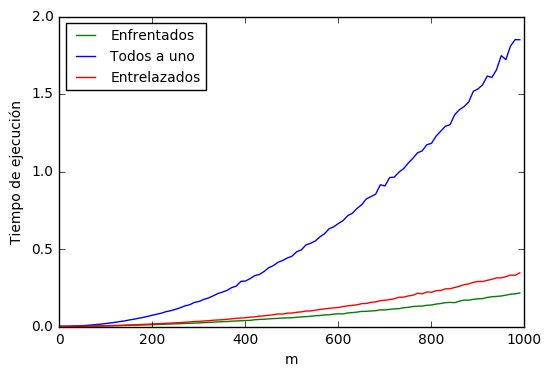

In [46]:
x = range(1,1000,10)
plt.xlabel("m")
plt.ylabel("Tiempo de ejecución")

plt.plot(x,t_enfrente2, 'g', label = "Enfrentados")
plt.plot(x,t_a_uno2, 'b', label = "Todos a uno")
plt.plot(x,t_mezclado2, 'r', label = "Entrelazados")

plt.legend(loc='upper left', prop={'size': 10})

In [55]:
# Crecimiento de grafo denso.

# Hardcore. Inicio con 100 areas y vamos agregando proyectos y conectando en frente y todos con uno.

x = range(1,100,1)
t_conj = []
t_conj10 = []
# TODO agregar mezclado/clusterizado.

for i in x:
    def_conjunto = str(i) + "\n" + str(i) +"\n"
    def_conjunto10 = str(i) + "\n" + str(i) +"\n"
    for j in range (i):
        def_conjunto += "1\n"
        def_conjunto10 += "100\n"
    for k in range(i):
        def_conjunto += "1"
        def_conjunto10 += "100"
        for j in range(1,i+1):
            def_conjunto += " " + str(j)
            def_conjunto10 += " " + str(j)
        def_conjunto += "\n"
        def_conjunto10 += "\n"
        
    ps_conjunto = ProjectSelection(def_conjunto, solve = False)
    ps_conjunto10 = ProjectSelection(def_conjunto10, solve = False)
    
    t = timeit.Timer(partial(ps_conjunto.solve))
    t_conj.append((t.timeit(1)))
    t = timeit.Timer(partial(ps_conjunto10.solve))
    t_conj10.append((t.timeit(1)))

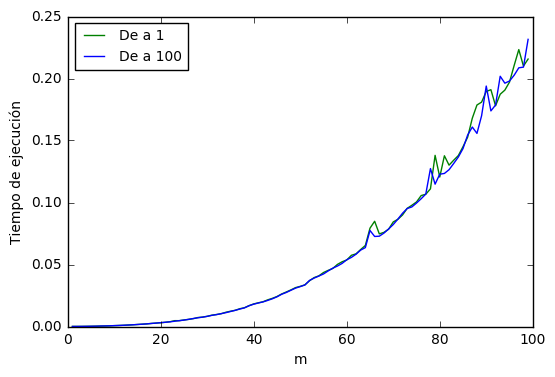

In [57]:
x = range(1,100,1)
plt.xlabel("m")
plt.ylabel("Tiempo de ejecución")

plt.plot(x,t_conj, 'g', label = "De a 1")
plt.plot(x,t_conj10, 'b', label = "De a 100")

plt.legend(loc='upper left', prop={'size': 10})